## Support Vector Machine in SKlearn

In [48]:
import sys
sys.path.append("/home/cit5/Downloads/ud120-projects-master/tools/")
sys.path.append('/home/cit5/Downloads/ud120-projects-master/choose_your_own')
sys.path.append('/home/cit5/Downloads/ud120-projects-master/svm')

import os
os.chdir('/home/cit5/Downloads/ud120-projects-master/svm')


from class_vis import prettyPicture
from prep_terrain_data import makeTerrainData

import sys
import matplotlib.pyplot as plt
import copy
import numpy as np
import pylab as pl

from sklearn.metrics import accuracy_score


features_train, labels_train, features_test, labels_test = makeTerrainData()


########################## Support Vector Machine #################################
from sklearn.svm import SVC

# Accuracy Function
def submitAccuracy():
    return accuracy_score(pred, labels_test)

# Create classifier
clf = SVC(kernel="linear")

# Fit the classifier on the training features and labels
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

print(accuracy_score(pred, labels_test))

0.92


## Kernel and Gamma

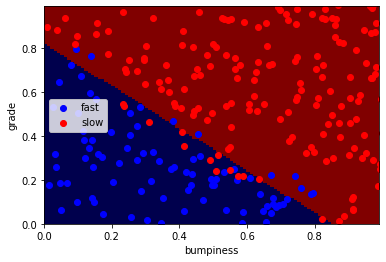

In [49]:
clf = SVC(kernel="linear", gamma=1.0)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

%matplotlib inline
prettyPicture(clf, features_test, labels_test)

## SVM `C` Parameter

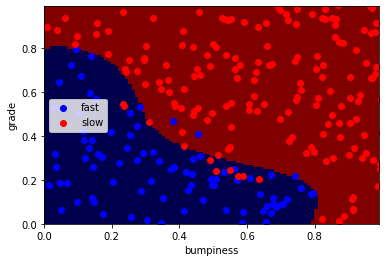

In [51]:
clf = SVC(kernel="rbf", C=10**5, gamma="auto")
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

%matplotlib inline
prettyPicture(clf, features_test, labels_test)

## SVM `gamma` Parameter

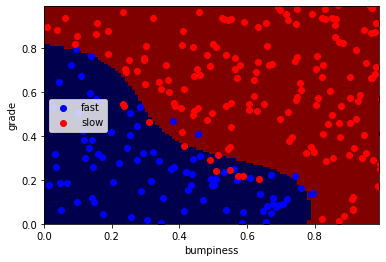

In [42]:
clf = SVC(kernel="rbf", gamma=10)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

%matplotlib inline
prettyPicture(clf, features_test, labels_test)

## SVM Author ID Accuracy & Timing

In [52]:
""" 
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:    
    Sara has label 0
    Chris has label 1
"""
from sklearn.metrics import accuracy_score

from time import time
from email_preprocess_data import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()


def my_svm(features_train, features_test, labels_train, labels_test, kernel='linear', C=1.0):
    # the classifier
    clf = SVC(kernel=kernel, C=C, gamma="auto")

    # train
    t0 = time()
    clf.fit(features_train, labels_train)
    print("\ntraining time:", round(time()-t0, 3), "s")

    # predict
    t0 = time()
    pred = clf.predict(features_test)
    print("predicting time:", round(time()-t0, 3), "s")
    
    # accuracy
    accuracy = accuracy_score(pred, labels_test)

    print('\naccuracy = {0}'.format(accuracy))
    return pred

pred = my_svm(features_train, features_test, labels_train, labels_test)

no. of Chris training emails: 7936
no. of Sara training emails: 7884

training time: 157.546 s
predicting time: 17.18 s

accuracy = 0.9840728100113766


## A Smaller Training Set

In [53]:
features_train2 = features_train[:int(len(features_train)/100)]
labels_train2 = labels_train[:int(len(labels_train)/100)]

pred = my_svm(features_train2, features_test, labels_train2, labels_test)


training time: 0.105 s
predicting time: 0.954 s

accuracy = 0.8845278725824801


## Deploy an RBF Kernel

In [54]:
pred = my_svm(features_train2, features_test, labels_train2, labels_test, 'rbf')


training time: 0.115 s
predicting time: 1.063 s

accuracy = 0.6160409556313993


## Optimize `C` Parameter

In [55]:
for C in [10, 100, 1000, 10000]:
    print('C =',C)
    pred = my_svm(features_train2, features_test, labels_train2, labels_test, kernel='rbf', C=C)
    print('\n\n')

C = 10

training time: 0.122 s
predicting time: 1.069 s

accuracy = 0.6160409556313993



C = 100

training time: 0.106 s
predicting time: 1.065 s

accuracy = 0.6160409556313993



C = 1000

training time: 0.094 s
predicting time: 1.018 s

accuracy = 0.8213879408418657



C = 10000

training time: 0.093 s
predicting time: 0.863 s

accuracy = 0.8924914675767918





## Optimized RBF vs. Linear SVM: Accuracy

In [56]:
pred = my_svm(features_train, features_test, labels_train, labels_test, kernel='rbf', C=10000)


training time: 108.747 s
predicting time: 10.457 s

accuracy = 0.9908987485779295


## Extracting Predictions from an SVM

In [57]:
print(pred[10])
print(pred[26])
print(pred[50])

1
0
1


## How many Chris emails predicted?

In [58]:
print(sum(pred))

877
